# ================Fake News Classification===============

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For creating more advanced visualizations
from nltk.tokenize import RegexpTokenizer  # For tokenizing text
from collections import Counter  # For counting occurrences of elements in a list
from sklearn import preprocessing  # For data preprocessing and scaling
import re  # For regular expressions, used for text processing
from wordcloud import WordCloud  # For generating word clouds
import nltk  # Natural Language Toolkit for text processing tasks
import string  # For string manipulation operations
from nltk.corpus import stopwords  # For NLTK's stopwords
nltk.download("stopwords")  # Downloading NLTK's stopwords data
import matplotlib.cm as cm  # For colormap settings in visualizations
from matplotlib import rcParams  # For customizing plot settings
%matplotlib inline
import warnings  # For managing warnings
warnings.filterwarnings("ignore")  # To ignore displaying warnings in the output


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading  Dataset

In [ ]:
# Reading the 'True' CSV file into a DataFrame named 'true'
true = pd.read_csv('/content/drive/MyDrive/Fake news detection /Nazish Khan/True (1).csv')

# Reading the 'Fake' CSV file into a DataFrame named 'fake'
fake = pd.read_csv('/content/drive/MyDrive/Fake news detection /Nazish Khan/Fake (1).csv')

## Combining the true and fake news

In [ ]:
# Adding a new column 'label' with value 'fake' to the 'true' DataFrame
true['label'] = 'fake'

# Adding a new column 'label' with value 'true' to the 'fake' DataFrame
fake['label'] = 'true'

# Concatenating the 'true' and 'fake' DataFrames vertically (along axis 0)
# This combines the two DataFrames into a single DataFrame named 'data'
# The 'data' DataFrame will have all the rows from 'true' DataFrame followed by all the rows from 'fake' DataFrame
data = pd.concat([true, fake], axis=0)

In [ ]:
data.head()
data.shape

(44898, 1)

# Selection of the interested columns for feature extraction

In [ ]:
data=data[['text','label']]

In [ ]:
data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,fake
1,WASHINGTON (Reuters) - Transgender people will...,fake
2,WASHINGTON (Reuters) - The special counsel inv...,fake
3,WASHINGTON (Reuters) - Trump campaign adviser ...,fake
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,fake


# Count of the dataset

In [ ]:
print('Count of the dataset is: ', len(data))

Count of the dataset is:  44898


# Dataset analysis and Preprocessing

# text text in lower case

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].head()

0    washington (reuters) - the head of a conservat...
1    washington (reuters) - transgender people will...
2    washington (reuters) - the special counsel inv...
3    washington (reuters) - trump campaign adviser ...
4    seattle/washington (reuters) - president donal...
Name: text, dtype: object

# all columns

In [ ]:
data.columns

Index(['text', 'label'], dtype='object')

# Unique texts labels

In [ ]:
data['label'].unique()

array(['fake', 'true'], dtype=object)

# data types of all columns

In [ ]:
data.dtypes

text     object
label    object
dtype: object

# Checking Null values

In [ ]:
# Filtering rows with any missing (NaN) values in the 'data' DataFrame
data[data.isnull().any(axis=1)]

,text,label


# Count of Null values

In [ ]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

# Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


# Frequency Distribution of label

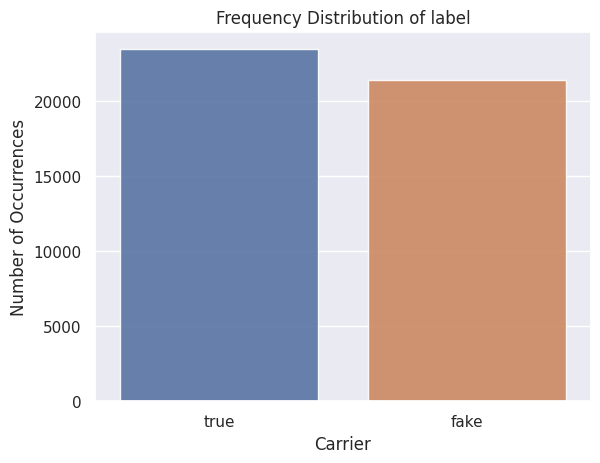

In [ ]:
# Enable inline plotting for Jupyter Notebook or other compatible environments
%matplotlib inline

# Calculate the frequency counts of each unique value in the 'label' column of the 'data' DataFrame
carrier_count = data["label"].value_counts()

# Set the style for the seaborn plots to 'darkgrid'
sns.set(style="darkgrid")

# Create a bar plot using seaborn with the frequency distribution of the 'label' column
# The x-axis will represent the unique values of 'label', and the y-axis will represent their respective frequencies
# The alpha parameter sets the transparency of the bars to 0.9 (less transparent)
sns.barplot(x=carrier_count.index, y=carrier_count.values, alpha=0.9)

# Set the title of the plot
plt.title('Frequency Distribution of label')

# Set the label for the y-axis
plt.ylabel('Number of Occurrences', fontsize=12)

# Set the label for the x-axis
plt.xlabel('Carrier', fontsize=12)

# Display the plot
plt.show()


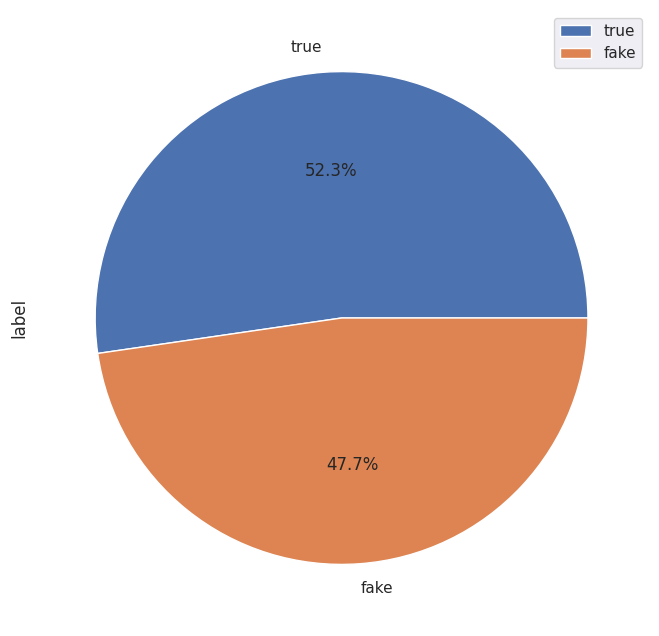

In [ ]:
# Calculate the frequency counts of each unique value in the 'label' column of the 'data' DataFrame
label_counts = data["label"].value_counts()

# Select the top 3 most frequent labels and create a pie chart
label_counts.head(3).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

# Add a legend to the pie chart
plt.legend()


In [ ]:
data["label"].value_counts()

true    23481
fake    21417
Name: label, dtype: int64

# Preproccessing of words

In [ ]:
# Replacing 'america' with 'american'
data.loc[data["text"].str.contains('america'), 'text'] = 'american'

# Replacing 'americans' with 'american'
data.loc[data["text"].str.contains('americans'), 'text'] = 'american'

# Replacing 'youore' with 'you are'
data.loc[data["text"].str.contains('youore'), 'text'] = 'you are'

# Replacing 'youre' with 'you are'
data.loc[data["text"].str.contains('youre'), 'text'] = 'you are'

# Replacing 'years' with 'year'
data.loc[data["text"].str.contains('years'), 'text'] = 'year'

# Replacing 'break' with 'breakingnews'
data.loc[data["text"].str.contains('break'), 'text'] = 'breakingnews'

# Replacing 'breaking' with 'breakingnews'
data.loc[data["text"].str.contains('breaking'), 'text'] = 'breakingnews'

# Replacing 'caused' with 'cause'
data.loc[data["text"].str.contains('caused'), 'text'] = 'cause'

# Replacing 'causes' with 'cause'
data.loc[data["text"].str.contains('causes'), 'text'] = 'cause'

# Replacing 'county' with 'country'
data.loc[data["text"].str.contains('county'), 'text'] = 'country'


In [ ]:
# Removing specific characters from the 'text' column in the 'data' DataFrame

for letter in '1234567890.(/':
    # For each character in the string '1234567890.(/', remove it from the 'text' column
    data["text"] = data["text"].str.replace(letter, '')


# Preprocess data on Descripcion

In [ ]:
# Importing the 'string' module to access English punctuation characters
english_punctuations = string.punctuation

# Creating a list of punctuation characters duplicated for removal purposes
punctuations_list = english_punctuations + english_punctuations

# Defining a function to remove punctuations from a given text
def remove_punctuations(text):
    # Creating a translator using str.maketrans() to remove punctuation characters from the text
    translator = str.maketrans('', '', punctuations_list)

    # Using the translator to remove punctuation characters from the text
    return text.translate(translator)


# Remove_repeating_char

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# ProcessPost for applying all functions

In [ ]:

# Define a function named 'processPost' for text preprocessing
def processPost(text):

    # Remove @mentions (e.g., @username) from the text
    text = re.sub('@[^\s]+', ' ', text)

    # Remove URLs (e.g., http://www.example.com or www.example.com) from the text
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)

    # Remove the '#' symbol from hashtags but keep the text part of the hashtag
    text = re.sub(r'#([^\s]+)', r'\1', text)

    # Call a function 'remove_punctuations' to remove all punctuation characters from the text
    text = remove_punctuations(text)

    # Call a function 'remove_repeating_char' to remove repeating characters (optional, not provided in the code snippet)
    text = remove_repeating_char(text)

    # Return the preprocessed text
    return text


# Applying processPost function for preprocessing

In [ ]:
# Applying the 'processPost' function to each element in the 'text' column of the 'data' DataFrame

data["text"] = data["text"].apply(lambda x: processPost(x))


# Getting Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

# Create a RegexpTokenizer to tokenize text into words
tokenizer = RegexpTokenizer(r'\w+')

# Apply the tokenizer to each element (text) in the 'text' column of the 'data' DataFrame
data["text"] = data["text"].apply(tokenizer.tokenize)


In [ ]:
data["text"].head()

0                                               [year]
1                                           [american]
2    [washington, reuters, the, special, counsel, i...
3                                           [american]
4                                           [american]
Name: text, dtype: object

# Stop words of english

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
len(stopwords_list)

179

In [ ]:
data["text"]=data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
data["text"].head()

0                                               [year]
1                                           [american]
2    [washington, reuters, special, counsel, invest...
3                                           [american]
4                                           [american]
Name: text, dtype: object

# Description of text information

In [ ]:
# Create a list of all words by iterating through each tokenized text in the 'text' column
all_words = [word for tokens in data["text"] for word in tokens]

# Create a list of sentence lengths by computing the length of each tokenized text in the 'text' column
sentence_lengths = [len(tokens) for tokens in data["text"]]

# Create a sorted list of unique words to obtain the vocabulary
VOCAB = sorted(list(set(all_words)))

# Print the total number of words and the vocabulary size
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

# Print the maximum sentence length
print("Max sentence length is %s" % max(sentence_lengths))


3138438 words total, with a vocabulary size of 90312
Max sentence length is 1511


# Top 25 words in text

In [ ]:
from collections import Counter

# Create a Counter object to count the occurrences of each word in the 'all_words' list
counter = Counter(all_words)


In [ ]:
# Get the 25 most common words and their counts from the 'counter' Counter object

# The 'most_common()' method returns a list of the most common elements (words) and their counts.
# The argument '25' specifies that we want the top 25 most common elements.
counter.most_common(25)

[('said', 48117),
 ('trump', 38884),
 ('us', 19022),
 ('would', 16518),
 ('president', 16516),
 ('american', 16452),
 ('wil', 15049),
 ('reuters', 14006),
 ('ben', 13175),
 ('year', 11199),
 ('people', 10918),
 ('state', 10817),
 ('one', 10069),
 ('al', 9963),
 ('also', 9383),
 ('house', 9379),
 ('donald', 9334),
 ('new', 9159),
 ('government', 9116),
 ('told', 8619),
 ('clinton', 7738),
 ('could', 7220),
 ('states', 7157),
 ('campaign', 7046),
 ('republican', 7044)]

In [ ]:
from collections import Counter

# Create a Counter object to count the occurrences of each word in 'all_words' list
counted_words = Counter(all_words)

# Initialize empty lists to store the 25 most common words and their respective counts
words = []
counts = []

# Extract the 25 most common words and their counts from the 'counted_words' Counter
for word, count in counted_words.most_common(25):
    words.append(word)
    counts.append(count)


<BarContainer object of 25 artists>

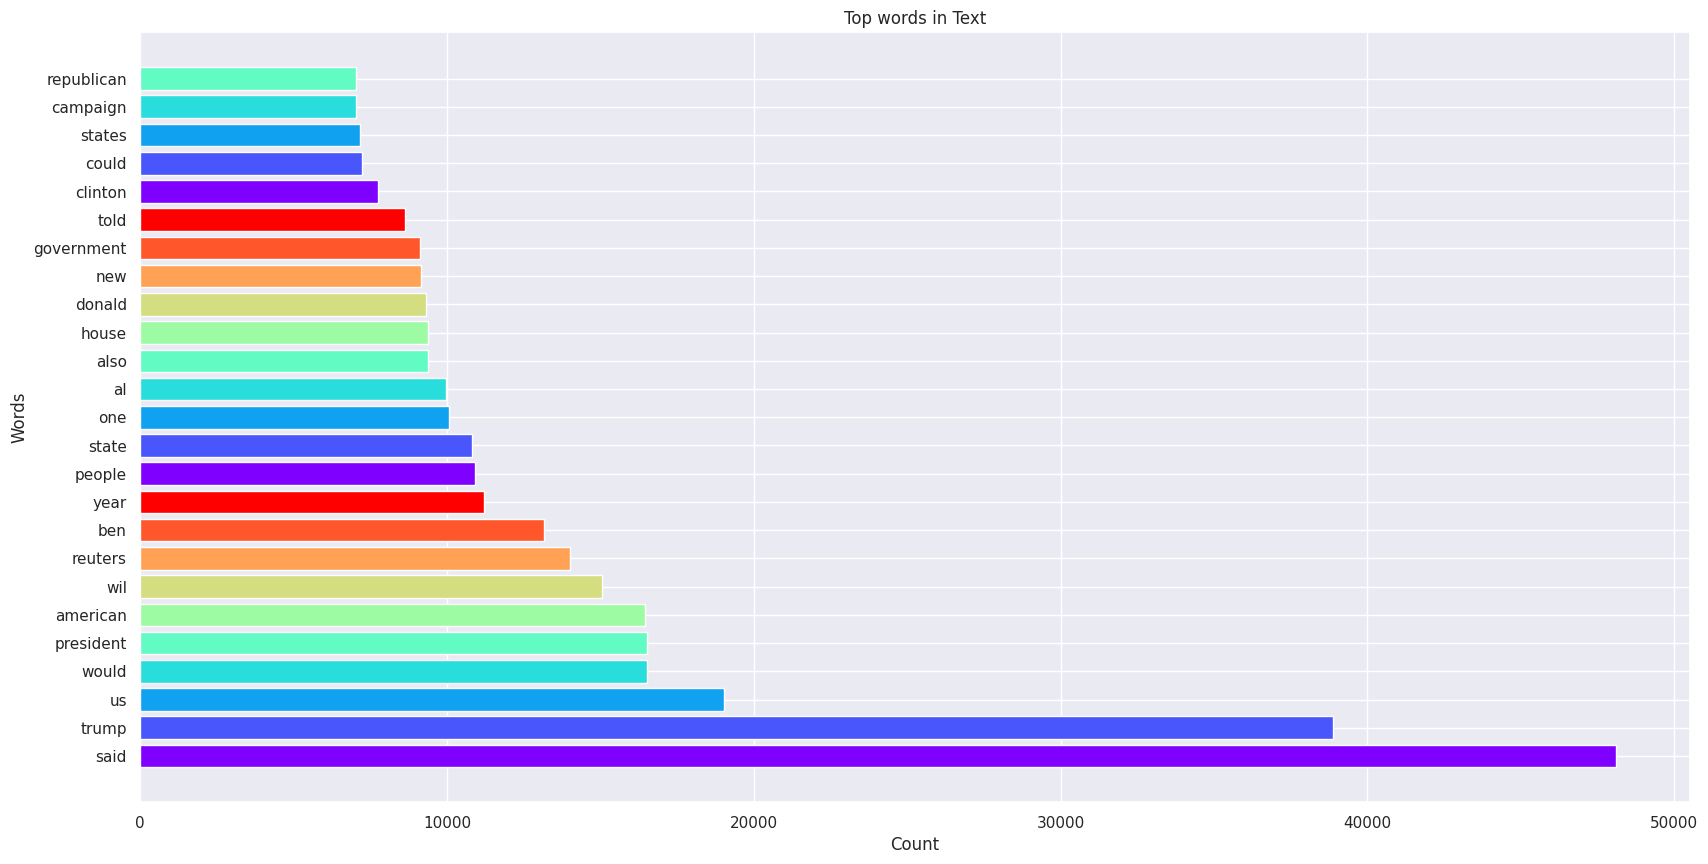

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Word cloud of true news

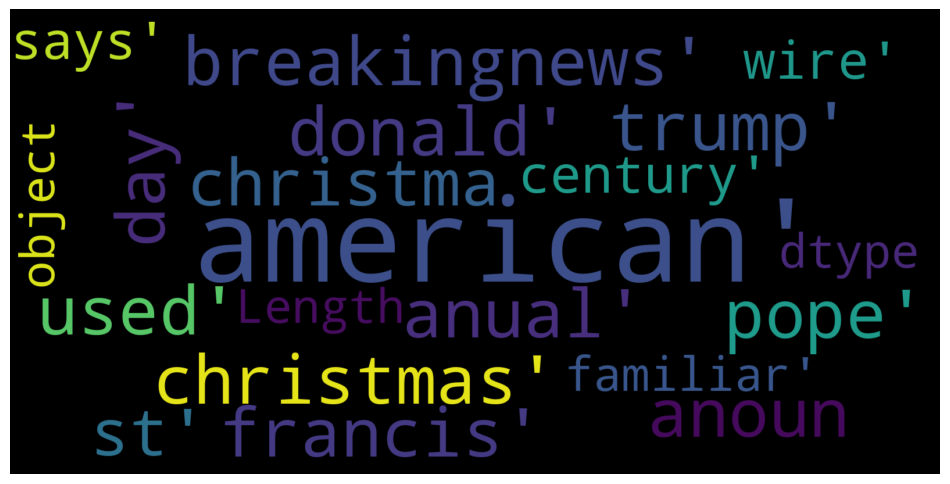

In [ ]:
# Extract the 'text' data corresponding to the label 'true' from the 'data' DataFrame
data1 = data[data['label'] == 'true']
neg = data1['text']

# Convert the 'text' data to a list of strings
neg_string = []
for t in neg:
    neg_string.append(t)

# Convert the list of strings to a single string
neg_string = pd.Series(neg_string).map(str)
neg_string = str(neg_string)

# Generate a word cloud for the 'neg_string' text data
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)

# Display the word cloud in a plot
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Word cloud of fake news

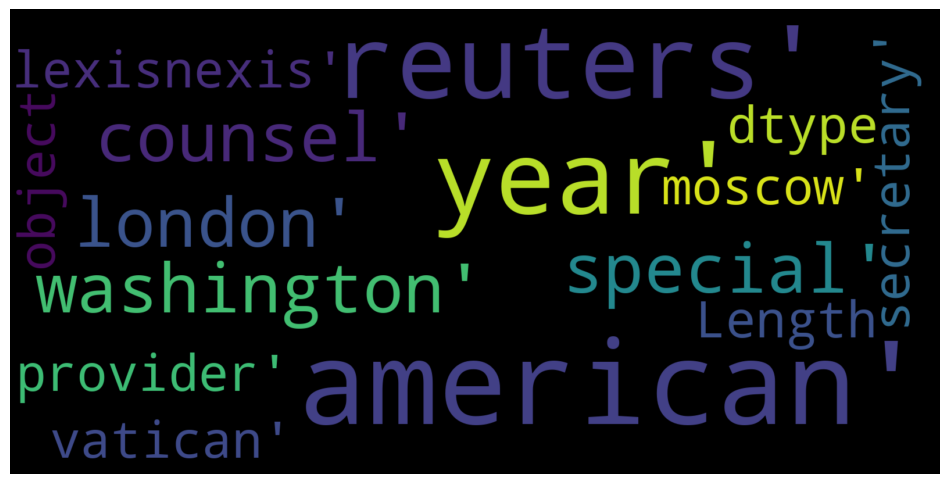

In [ ]:
data1=data[data['label']=='fake']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Features Extraction From the texts Text

# - Unigram features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with specified settings

# sublinear_tf=True: Apply sublinear scaling to the term frequency (TF). It replaces the term frequency with 1 + log(TF).
# strip_accents='unicode': Remove accents during the preprocessing step (e.g., convert é to e).
# analyzer='word': Analyze text at the word level.
# token_pattern=r'\w{1,}': Use a regular expression to extract tokens consisting of one or more alphanumeric characters.
# stop_words='english': Remove common English stop words (e.g., 'the', 'and', 'is') from the text.
# ngram_range=(1, 1): Consider only individual words (unigrams) and not word pairs (bigrams) or more.
# max_features=1000: Limit the number of features (words) to the top 1000 by frequency of occurrence.

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=1000
)


# Preparing features for training and testing

In [ ]:
# Perform TF-IDF vectorization on the 'text' data in the 'data' DataFrame
unigramdataGet = word_vectorizer.fit_transform(data['text'].astype('str'))

# Convert the TF-IDF matrix to a dense array
unigramdataGet = unigramdataGet.toarray()

# Get the vocabulary (words) learned by the TF-IDF vectorizer
vocab = word_vectorizer.get_feature_names_out()

# Create a binary matrix representation of the TF-IDF values
unigramdata = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata > 0] = 1

# Display the first few rows of the resulting binary matrix
unigramdata.head()


,able,absolutely,acept,aces,acording,acount,acr,acros,act,action,...,wrong,wrote,xi,year,yearold,yemen,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First 100 words of vocab

In [ ]:
# Extract the first 100 words from the vocabulary learned by the TF-IDF vectorizer
vocab_subset = vocab[0:100]


In [ ]:
# Calculate and print the length of the vocabulary learned by the TF-IDF vectorizer
vocab_length = len(vocab)
print('Vocab Length:', vocab_length)


Vocab Length: 1000


In [ ]:
len(unigramdata)

44898

# Deleteing the text column because we have been extracted features from this

In [ ]:
# Reset the index of the DataFrame and drop the 'text' column

# Reset the index of the DataFrame while dropping the old index.
# The 'drop=True' argument ensures that the old index is dropped, and the 'inplace=True' argument applies the changes directly to the 'data' DataFrame.
data.reset_index(drop=True, inplace=True)

# Drop the 'text' column from the DataFrame.
# The result of the 'drop()' operation is assigned back to the 'data' DataFrame, effectively removing the 'text' column from it.
data = data.drop(columns=['text'])


# Feature selection from the extracted features of unigram

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Create a SelectKBest object with chi-squared test as the scoring function and k=700 features to select.
selector = SelectKBest(chi2, k=700)

# Fit the SelectKBest object to the 'unigramdata' DataFrame and the corresponding labels in 'data' DataFrame.
selector.fit(unigramdata, data['label'])

# Transform the 'unigramdata' DataFrame to include only the top 700 selected features.
unigramdata = selector.transform(unigramdata)

# Print the shape of the resulting 'unigramdata'.
print(unigramdata.shape)


(44898, 700)


# -----------------------Traning and Testing with Unigram Features------------------------

In [ ]:
# Assign 'unigramdata' to the feature matrix 'X'
X = unigramdata

# Assign the 'label' column from 'data' to the target vector 'y'
y = data['label']

# Spliting Dataset into 70% Training and 30% Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a test size of 30% and random state 100 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


# SVM Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import LinearSVC

# Create a LinearSVC model with regularization parameter C=1 and a maximum number of iterations max_iter=500.
svc = LinearSVC(C=1, max_iter=500)

# Fit (train) the LinearSVC model using the training data.
svc = svc.fit(X_train, y_train)

# Return the trained LinearSVC model.
svc


LinearSVC(C=1, max_iter=500)

# Accuracy

In [ ]:
# Use the trained LinearSVC model to predict labels for the test data.
y_pred1 = svc.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels (y_pred1) with the true labels (y_test).
dm = svc.score(X_test, y_test)

# Print the accuracy score of the model.
print('Accuracy score = {:.2f}'.format(dm))


Accuracy score = 0.80


# Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report using the true labels (y_test) and the predicted labels (y_pred1).
CR = classification_report(y_test, y_pred1)

# Print the classification report, which contains precision, recall, F1-score, and other metrics for each class.
print('\n')
print("Precision, Recall, F1")
print('\n')
print(CR)
print('\n')




Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.79      0.80     13470
weighted avg       0.81      0.80      0.80     13470





# Confusion Matrix



Confusion Matrix


[[4525 1889]
 [ 818 6238]]




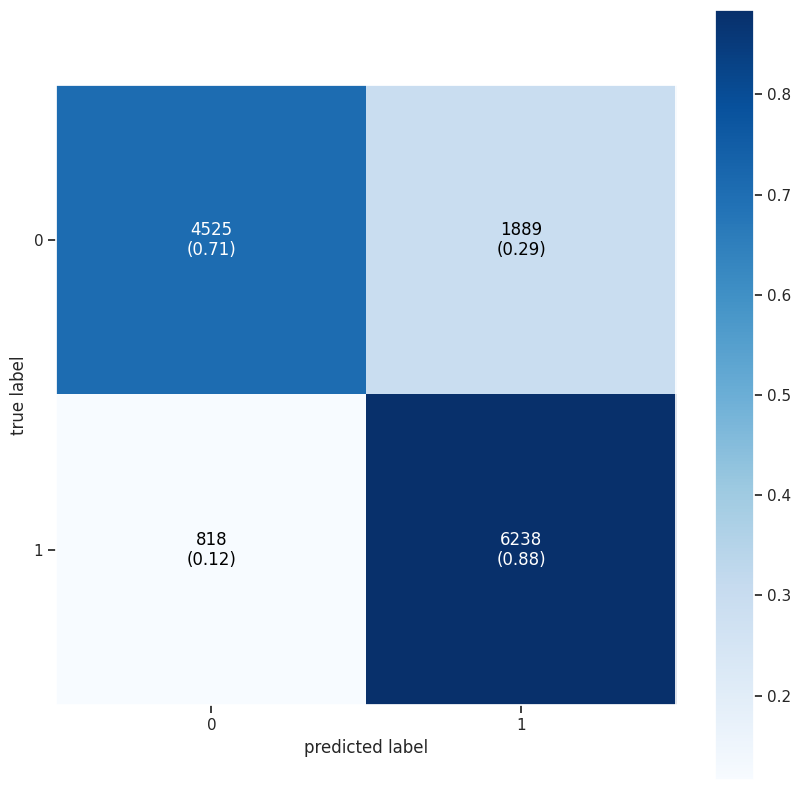

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Compute the confusion matrix using the true labels (y_test) and the predicted labels (y_pred1).
CR = confusion_matrix(y_test, y_pred1)

# Print the confusion matrix.
print('\n')
print("Confusion Matrix")
print('\n')
print(CR)
print('\n')

# Visualize the confusion matrix using the plot_confusion_matrix function.
fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# Create a Gaussian Naive Bayes classifier with the var_smoothing parameter set to 1e-08.
nab = GaussianNB(var_smoothing=1e-08)

# Fit (train) the Gaussian Naive Bayes classifier using the training data.
nab = nab.fit(X_train, y_train)

# Return the trained Gaussian Naive Bayes classifier.
nab


GaussianNB(var_smoothing=1e-08)

# Accuracy

In [ ]:
# Use the trained Gaussian Naive Bayes classifier to predict labels for the test data.
y_pred1 = nab.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels (y_pred1) with the true labels (y_test).
nb = nab.score(X_test, y_test)

# Print the accuracy score of the model.
print('Accuracy score = {:.2f}'.format(nb))


Accuracy score = 0.73


# Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report using the true labels (y_test) and the predicted labels (y_pred1).
CR = classification_report(y_test, y_pred1)

# Print the classification report, which contains precision, recall, F1-score, and other metrics for each class.
print('\n')
print("Precision, Recall, F1")
print('\n')
print(CR)
print('\n')




Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.53      0.65      6414
        true       0.68      0.92      0.78      7056

    accuracy                           0.73     13470
   macro avg       0.77      0.72      0.72     13470
weighted avg       0.76      0.73      0.72     13470





# Confusion Matrix



confusion matrix


[[3376 3038]
 [ 578 6478]]




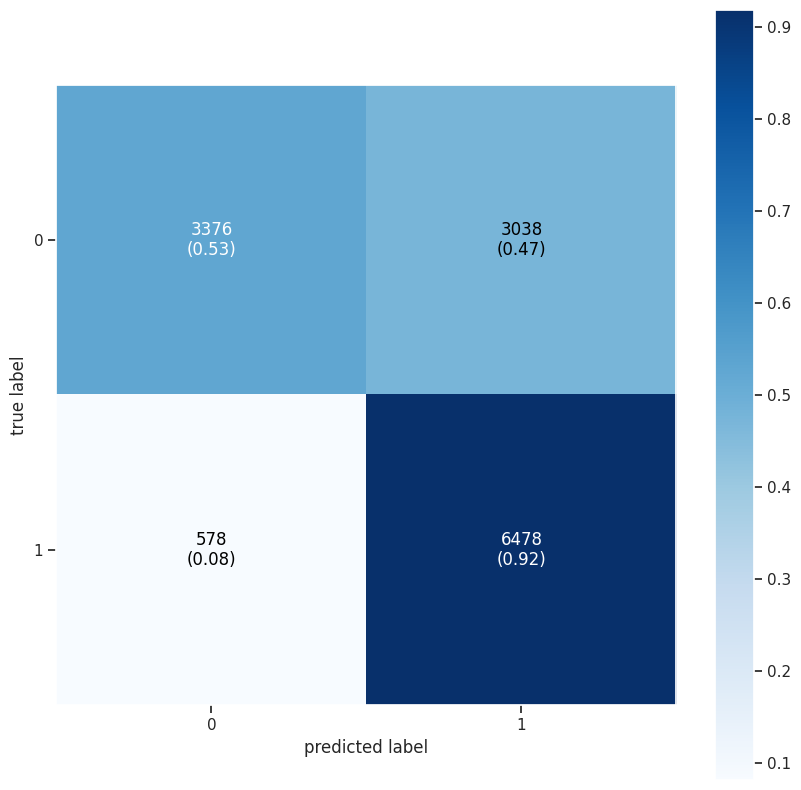

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2)

# Accuracy

In [ ]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.80


# Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.80      0.80     13470
weighted avg       0.81      0.80      0.80     13470





# Confusion Matrix



confusion matrix


[[4533 1881]
 [ 816 6240]]




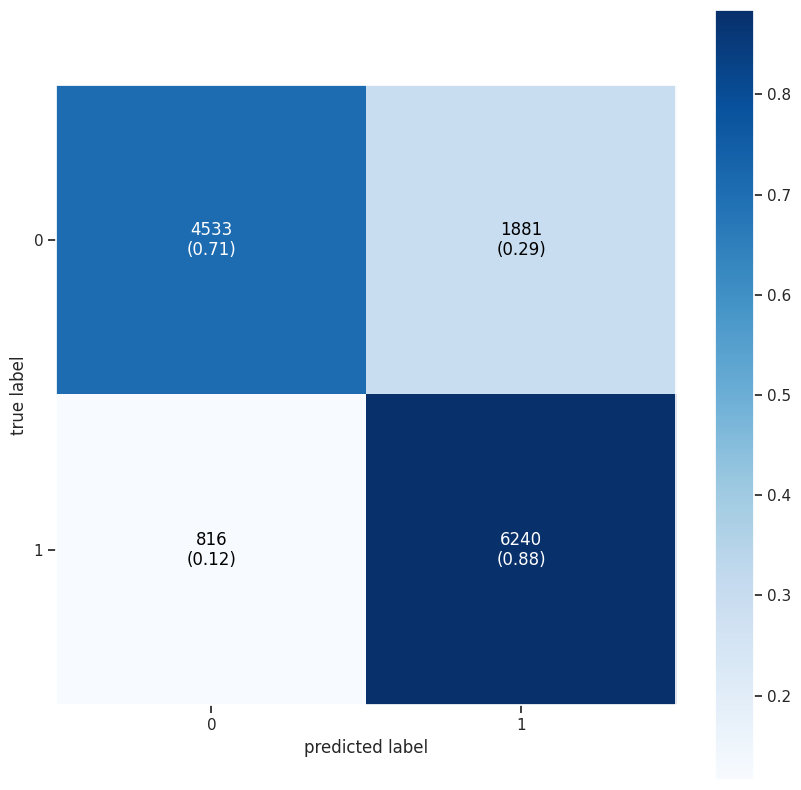

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=100)

# Accuracy

In [ ]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.79


# Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.84      0.69      0.76      6414
        true       0.76      0.88      0.82      7056

    accuracy                           0.79     13470
   macro avg       0.80      0.79      0.79     13470
weighted avg       0.80      0.79      0.79     13470





# Confusion Matrix



confusion matrix


[[4440 1974]
 [ 828 6228]]




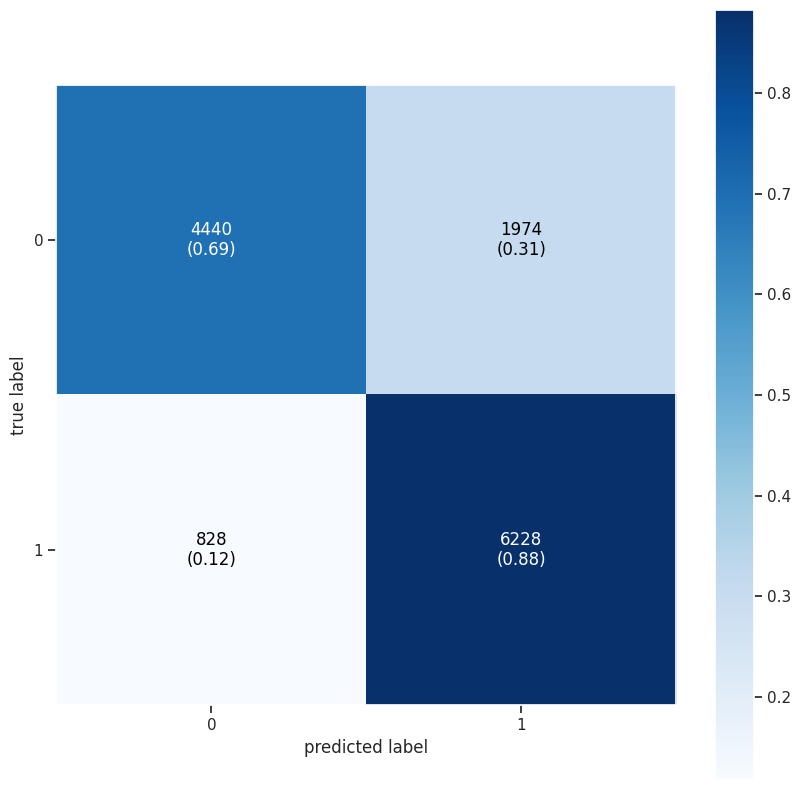

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Ensemble Technique to combine all algorithms and making one

In [ ]:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)

In [ ]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM', LinearSVC(C=1, max_iter=500)),
                             ('NB', GaussianNB(var_smoothing=1e-08)),
                             ('Log', LogisticRegression(C=2)),
                             ('raf',
                              RandomForestClassifier(min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     random_state=100))])

# Accuracy

In [ ]:
y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.80


# Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.84      0.71      0.77      6414
        true       0.77      0.87      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.80      0.79      0.79     13470
weighted avg       0.80      0.80      0.80     13470





# Confusion Matrix



confusion matrix


[[4582 1832]
 [ 900 6156]]




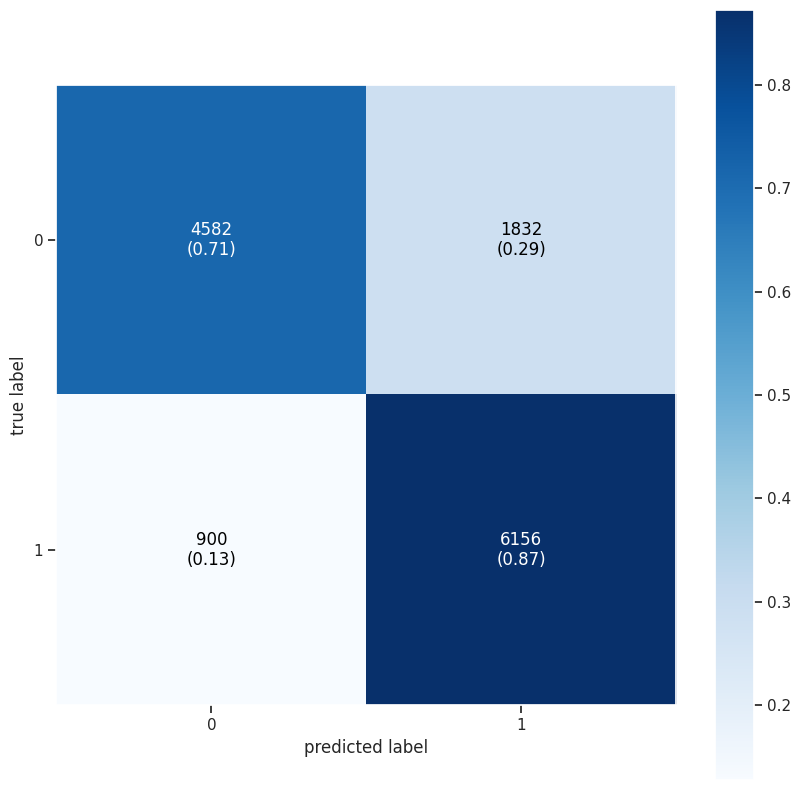

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results

In [ ]:
from prettytable import PrettyTable

# Create an empty table using PrettyTable.
x = PrettyTable()

# Add a column for Model names and a column for Accuracy values.
x.field_names = ["Model", "Accuracy"]

# Add rows to the table, each containing the Model name and its corresponding Accuracy score.
x.add_row(["SVM Algorithm", round(dm, 2)])
x.add_row(["Naive Bayes Algorithm", round(nb, 2)])
x.add_row(["LogisticRegression Algorithm", round(lr, 2)])
x.add_row(["Random Forest Algorithm", round(rf, 2)])
x.add_row(["Ensemble Modelling", round(en, 2)])

# Print the table.
print(x)
print('\n')


+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.8    |
|    Naive Bayes Algorithm     |   0.73   |
| LogisticRegression Algorithm |   0.8    |
|   Random Forest Algorithm    |   0.79   |
|      Ensemble Modelling      |   0.8    |
+------------------------------+----------+




# -------------------------------------------------------------------------------------------------------------